In [ ]:
//@version=5
indicator("D1 Candle Preview", overlay=true)

// === Inputs ===
bCol = input.color(#089981, title="Bull Border")
rCol = input.color(color.red, title="Bear Border")
bgB = input.color(color.new(#089981, 20), title="Bull Body")
bgR = input.color(color.new(#ff5252, 20), title="Bear Body")

// === Default Daily Candle (6:00 AM) ===
dO = request.security(syminfo.tickerid, "D", open)
dH = request.security(syminfo.tickerid, "D", high)
dL = request.security(syminfo.tickerid, "D", low)
dC = request.security(syminfo.tickerid, "D", close)

dBull = dC >= dO
dCol = dBull ? bCol : rCol
dBg = dBull ? bgB : bgR

ofs = 30
bw = 6
rIdx = bar_index + ofs + bw / 2
lIdx = bar_index + ofs - bw / 2
xMid = int(bar_index + ofs)

// Body
var box dBx = na
box.delete(dBx)
tB = math.max(dO, dC)
bB = math.min(dO, dC)
dBx := box.new(left=int(lIdx), right=int(rIdx), top=tB, bottom=bB, border_color=dCol, bgcolor=dBg)

// Wicks
var line dW1 = na
var line dW2 = na
line.delete(dW1)
line.delete(dW2)
dW1 := line.new(x1=xMid, y1=dH, x2=xMid, y2=tB, color=dCol)
dW2 := line.new(x1=xMid, y1=bB, x2=xMid, y2=dL, color=dCol)

// Labels
var label lblO = na
var label lblH = na
var label lblL = na
var label lblC = na
label.delete(lblO)
label.delete(lblH)
label.delete(lblL)
label.delete(lblC)

lblStyle = label.style_label_right
lblSize = size.tiny
lblOfs = -2

lblO := label.new(x=xMid + lblOfs, y=dO, text="6O " + str.tostring(dO, format.mintick), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)
lblH := label.new(x=xMid + lblOfs, y=dH, text="6H " + str.tostring(dH, format.mintick), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)
lblL := label.new(x=xMid + lblOfs, y=dL, text="6L " + str.tostring(dL, format.mintick), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)
lblC := label.new(x=xMid + lblOfs, y=dC, text="6C " + str.tostring(dC, format.mintick), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)

// Open lines
var line moL = na
line.delete(moL)
var line moH = na
line.delete(moH)
var line moLw = na
line.delete(moLw)

moL := line.new(x1=bar_index - 500, y1=dO, x2=xMid, y2=dO, color=color.rgb(0, 0, 0, 80), style=line.style_dotted, width=1)
moH := line.new(x1=bar_index - 500, y1=dL, x2=xMid, y2=dL, color=color.rgb(0, 0, 0, 50), style=line.style_dotted, width=1)
moLw := line.new(x1=bar_index - 500, y1=dH, x2=xMid, y2=dH, color=color.rgb(0, 0, 0, 50), style=line.style_dotted, width=1)

// === Custom Daily Candle (8:00 AM Manila) ===
sh = 24
sm = 0
st = timestamp("UTC", year, month, dayofmonth, sh, sm)

var float cO = na
var float cH = na
var float cL = na
var float cC = na

if (time == st)
    cO := open
    cH := high
    cL := low
    cC := close

if (not na(cO))
    cH := math.max(cH, high)
    cL := math.min(cL, low)
    cC := close

cBull = cC >= cO
cCol = cBull ? bCol : rCol
cBg = cBull ? bgB : bgR

cOfs = 37
cbw = 6
crIdx = bar_index + cOfs + cbw / 2
clIdx = bar_index + cOfs - cbw / 2
cX = int(bar_index + cOfs)

// Custom body
var box cBx = na
box.delete(cBx)
ctB = math.max(cO, cC)
cbB = math.min(cO, cC)
cBx := box.new(left=int(clIdx), right=int(crIdx), top=ctB, bottom=cbB, border_color=cCol, bgcolor=cBg)

// Custom wicks
var line cW1 = na
var line cW2 = na
line.delete(cW1)
line.delete(cW2)
cW1 := line.new(x1=cX, y1=cH, x2=cX, y2=ctB, color=cCol)
cW2 := line.new(x1=cX, y1=cbB, x2=cX, y2=cL, color=cCol)

// Custom labels
var label clO = na
var label clH = na
var label clL = na
var label clC = na
label.delete(clO)
label.delete(clH)
label.delete(clL)
label.delete(clC)

clStyle = label.style_label_left
clSize = size.tiny
clOfs = 2

clO := label.new(x=cX + clOfs, y=cO, text="8O " + str.tostring(cO, format.mintick), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
clH := label.new(x=cX + clOfs, y=cH, text="8H " + str.tostring(cH, format.mintick), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
clL := label.new(x=cX + clOfs, y=cL, text="8L " + str.tostring(cL, format.mintick), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
clC := label.new(x=cX + clOfs, y=cC, text="8C " + str.tostring(cC, format.mintick), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)

// Custom open lines
var line cMoL = na
line.delete(cMoL)
var line cMoH = na
line.delete(cMoH)
var line cMoLw = na
line.delete(cMoLw)

cMoL := line.new(x1=bar_index - 500, y1=cO, x2=cX, y2=cO, color=color.rgb(255, 0, 0, 80), style=line.style_dotted, width=1)
cMoH := line.new(x1=bar_index - 500, y1=cH, x2=cX, y2=cH, color=color.rgb(255, 0, 0, 50), style=line.style_dotted, width=1)
cMoLw := line.new(x1=bar_index - 500, y1=cL, x2=cX, y2=cL, color=color.rgb(255, 0, 0, 50), style=line.style_dotted, width=1)

// Date Label
var label cDt = na
label.delete(cDt)

cYOfs = (cH - cL) * 0.05
cLblY = cH + cYOfs

cDt := label.new(x=cX + clOfs, y=cC + 6, text=str.tostring(dayofmonth) + "/" + str.tostring(month) + "/" + str.tostring(year), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)

// TF Label
var label tfLbl = na
label.delete(tfLbl)
var label tfLbl2 = na
label.delete(tfLbl2)

tfS = ""
if (str.length(timeframe.period) > 1 and str.substring(timeframe.period, str.length(timeframe.period)-1, str.length(timeframe.period)) == "m")
    tfS := "m"
else if (str.length(timeframe.period) > 1 and str.substring(timeframe.period, str.length(timeframe.period)-1, str.length(timeframe.period)) == "h")
    tfS := "h"

tfP = str.replace(timeframe.period, tfS, "")
tfText = tfP + tfS + "m to 1D"

tfLbl := label.new(x=cX + clOfs, y=cC - 3, text=tfText, style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
tfLbl2 := label.new(x=cX + clOfs, y=cC - 2, text="Candle Type:", style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)

// Range Labels
dHL = math.abs(dH - dL)
dOC = math.abs(dO - dC)
cHL = math.abs(cH - cL)
cOC = math.abs(cO - cC)

var label dHLlbl = na
var label dOClbl = na
label.delete(dHLlbl)
label.delete(dOClbl)

var label cHLlbl = na
var label cOClbl = na
label.delete(cHLlbl)
label.delete(cOClbl)

var label dRange = na
var label cRange = na
label.delete(dRange)
label.delete(cRange)

dRange := label.new(x=cX + clOfs, y=cC + 10, text="6am Range", style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
dHLlbl := label.new(x=cX + clOfs, y=cC + 9, text="6HL: $" + str.tostring(dHL, format.mintick), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
dOClbl := label.new(x=cX + clOfs, y=cC + 8, text="6OC: $" + str.tostring(dOC, format.mintick), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
cRange := label.new(x=cX + clOfs, y=cC + 4, text="8am Range", style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
cHLlbl := label.new(x=cX + clOfs, y=cC + 3, text="8HL: $" + str.tostring(cHL, format.mintick), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
cOClbl := label.new(x=cX + clOfs, y=cC + 2, text="8OC: $" + str.tostring(cOC, format.mintick), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)

// UTC/UTC+8 Time
var label utcLbl = na
var label utc8Lbl = na
label.delete(utcLbl)
label.delete(utc8Lbl)

utcStr = "UTC: " + str.tostring(hour, "00") + ":" + str.tostring(minute, "00")
utc8H = (hour + 12) % 24
utc8Str = "UTC: " + str.tostring(utc8H, "00") + ":" + str.tostring(minute, "00")

utc8Lbl := label.new(x=cX + clOfs, y=cC + 13, text=utc8Str, style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
utcLbl := label.new(x=cX + clOfs, y=cC + 12, text=utcStr, style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)


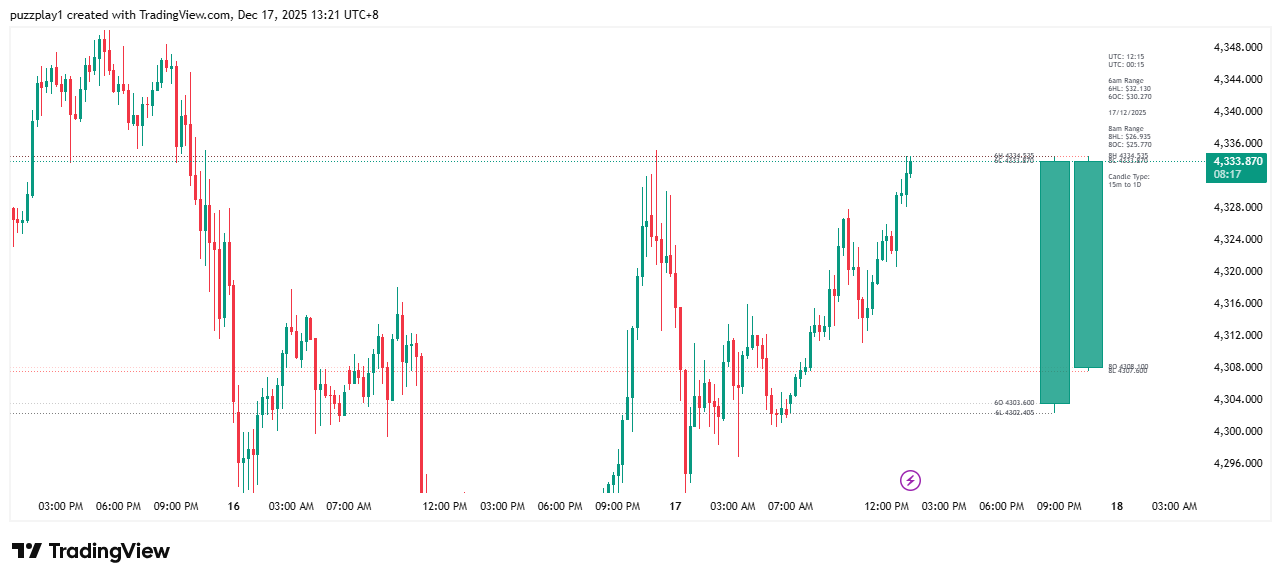